In [ ]:
!pip install text-hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 25.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving overruling.csv to overruling.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

In [ ]:
df = pd.read_csv('overruling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2400 non-null   int64 
 1   text    2400 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,label,text
0,0,876 f.3d at 1306.
1,0,the analysis below is included to satisfy our ...
2,0,my colleagues argue that their imposition of s...
3,0,"further, the easement is silent with regard to..."
4,1,"for the reasons that follow, we approve the fi..."
...,...,...
2395,1,"in the event the trial court cannot, for reaso..."
2396,1,to the extent that our holdings in patman v. s...
2397,1,we disapprove orange county v. sealy to the ex...
2398,1,to the extent that our previous opinion in sta...


In [ ]:
df['word_length'] = df['text'].apply(lambda x:len(x.split()))

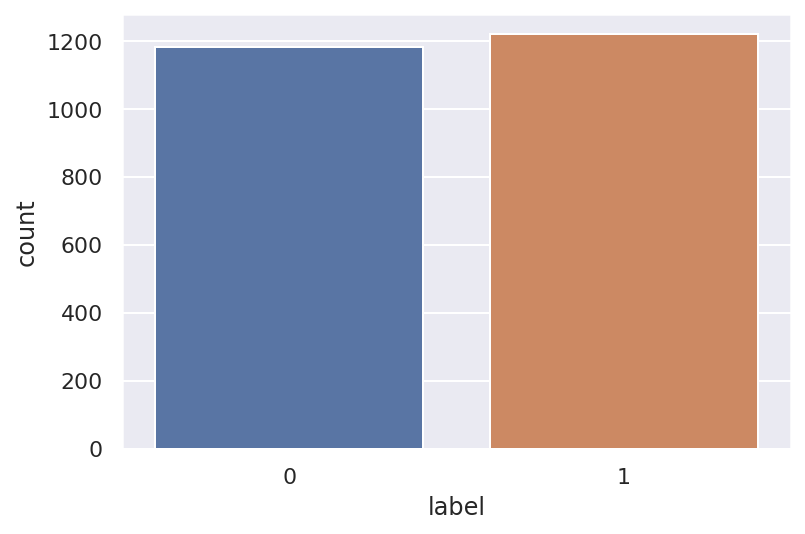

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.label)
plt.show()

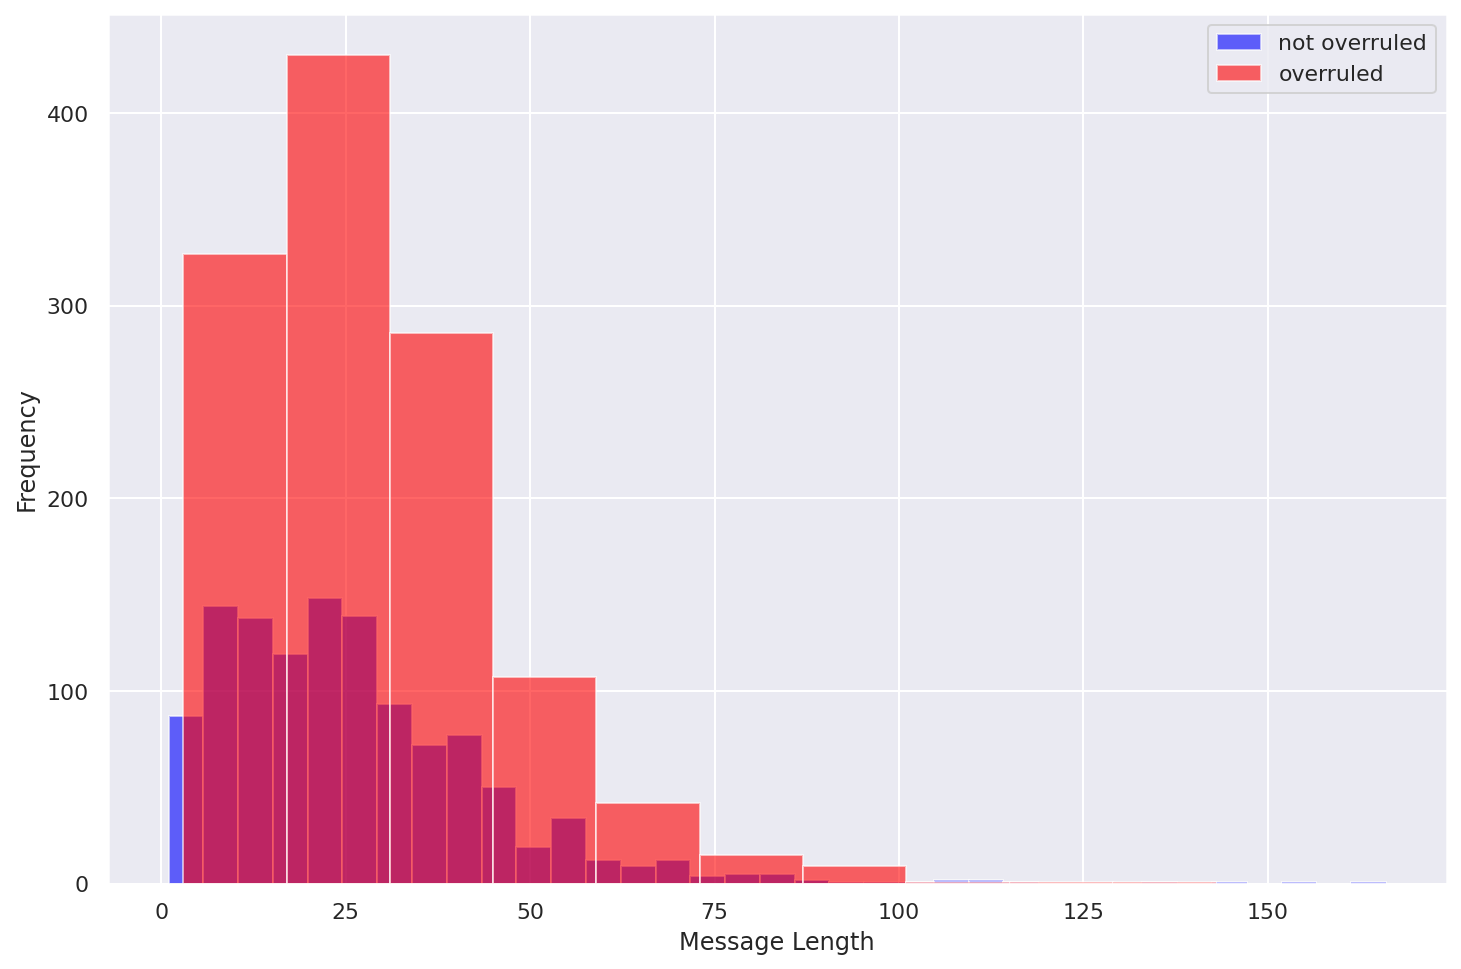

In [ ]:
plt.figure(figsize=(12, 8))

df[df.label==0].word_length.plot(bins=35, kind='hist', color='blue',
                                       label='not overruled', alpha=0.6)
df[df.label == 1].word_length.plot(kind='hist', color='red',
                                       label='overruled', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 433 µs, sys: 0 ns, total: 433 µs
Wall time: 379 µs


In [ ]:
%%time
cleaned_df = text_preprocessing(df, "text")

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

CPU times: user 20.6 s, sys: 261 ms, total: 20.9 s
Wall time: 21.1 s


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.text:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(50)

[('v', 832),
 ('court', 669),
 ('overrule', 632),
 ('extent', 512),
 ('case', 463),
 ('hold', 355),
 ('state', 328),
 ('decision', 309),
 ('disapprove', 302),
 ('opinion', 237),
 ('supra', 216),
 ('appeal', 205),
 ('rule', 185),
 ('trial', 177),
 ('inconsistent', 168),
 ('defendant', 167),
 ('district', 151),
 ('conflict', 145),
 ('contrary', 135),
 ('evidence', 133),
 ('claim', 124),
 ('so2d', 115),
 ('law', 114),
 ('follow', 103),
 ('find', 100),
 ('issue', 97),
 ('judgment', 92),
 ('order', 92),
 ('accordingly', 89),
 ('people', 89),
 ('statement', 88),
 ('require', 86),
 ('application', 86),
 ('_', 81),
 ('review', 80),
 ('sw2d', 79),
 ('apply', 79),
 ('motion', 79),
 ('fact', 78),
 ('d', 78),
 ('cir', 78),
 ('co', 77),
 ('prior', 74),
 ('section', 74),
 ('expressly', 72),
 ('support', 71),
 ('however', 71),
 ('language', 71),
 ('i', 70),
 ('act', 70)]

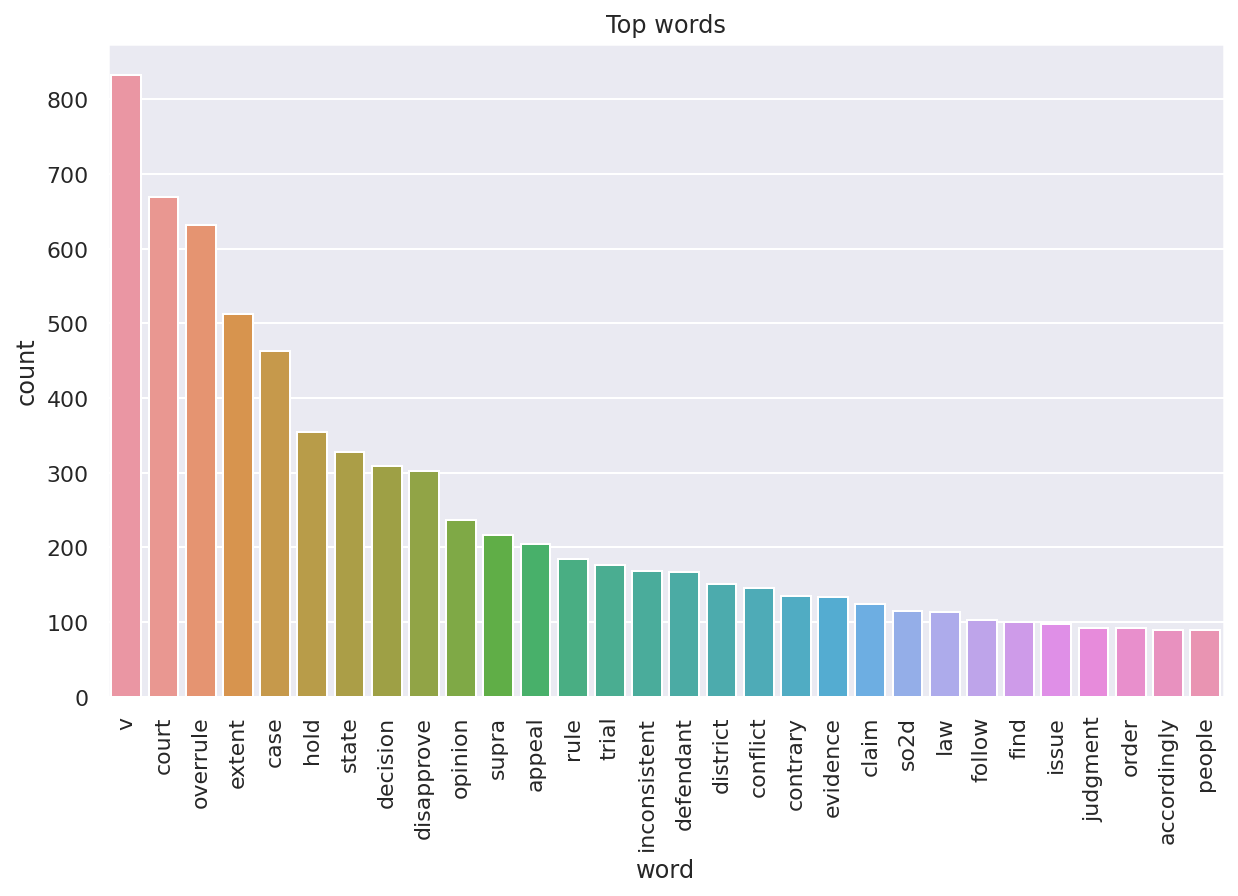

In [ ]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.text, cleaned_df.label, test_size = 0.8, stratify = cleaned_df.label, shuffle=True)

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 8294
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
len(tokenizer.word_index)

8294

In [ ]:
cleaned_df.word_length.max()

166

In [ ]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=166,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 166, padding = 'post')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [ ]:
EMBEDDING_DIM = 500
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))

model.add(Bidirectional(CuDNNGRU(256,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(CuDNNGRU(128,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(CuDNNGRU(64,return_sequences=False)))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-2, decay=1e-5),
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./modelBIgru(noaug).h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 5, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )

Epoch 1/5
4/4 [==============================] - ETA: 0s - loss: 0.9197 - accuracy: 0.5125
Epoch 1: val_accuracy improved from -inf to 0.74896, saving model to ./modelBIgru(noaug).h5
4/4 [==============================] - 9s 576ms/step - loss: 0.9197 - accuracy: 0.5125 - val_loss: 0.5131 - val_accuracy: 0.7490
Epoch 2/5
4/4 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.9396
Epoch 2: val_accuracy improved from 0.74896 to 0.83125, saving model to ./modelBIgru(noaug).h5
4/4 [==============================] - 1s 386ms/step - loss: 0.1847 - accuracy: 0.9396 - val_loss: 0.4407 - val_accuracy: 0.8313
Epoch 3/5
4/4 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9854
Epoch 3: val_accuracy did not improve from 0.83125
4/4 [==============================] - 1s 329ms/step - loss: 0.0514 - accuracy: 0.9854 - val_loss: 0.7529 - val_accuracy: 0.8188
Epoch 4/5
4/4 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9854
Epoch 4: va

In [ ]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

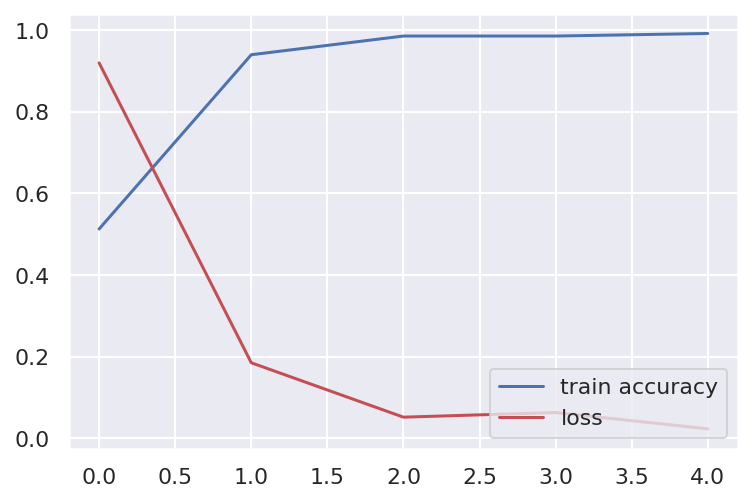

In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['loss'],c='r',label='loss')
plt.legend(loc='lower right')
plt.show()

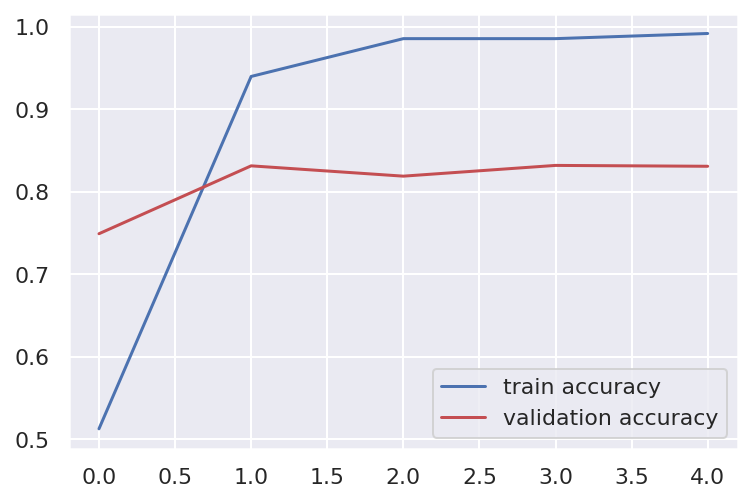

In [ ]:

plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

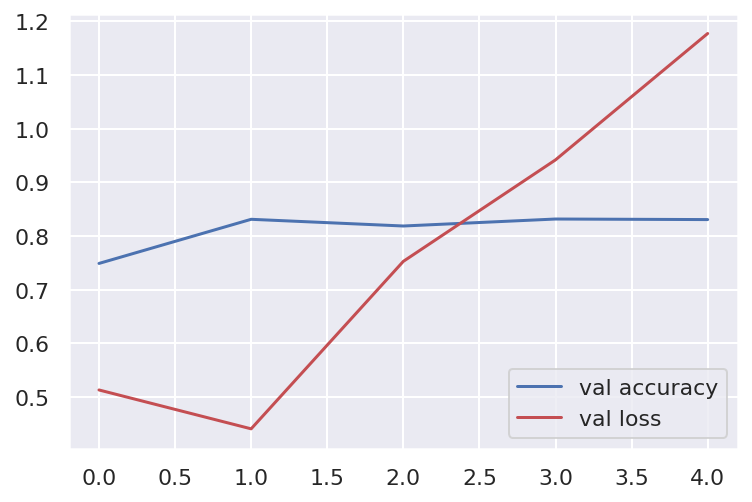

In [ ]:
plt.plot(history_embedding.history['val_accuracy'],c='b',label='val accuracy')
plt.plot(history_embedding.history['val_loss'],c='r',label='val loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.evaluate(X_test_pad, y_test)

60/60 [==============================] - 2s 21ms/step - loss: 1.1776 - accuracy: 0.8307


[1.177620530128479, 0.8307291865348816]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 166, 500)          4147000   
                                                                 
 bidirectional (Bidirectiona  (None, 166, 512)         1164288   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 166, 512)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 166, 256)         493056    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 166, 256)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              1

In [ ]:
y_pred = np.where(model.predict(X_test_pad)>.5,1,0)

60/60 [==============================] - 2s 18ms/step


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       764
           1       0.93      0.78      0.85      1156

    accuracy                           0.83      1920
   macro avg       0.83      0.84      0.83      1920
weighted avg       0.85      0.83      0.83      1920



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

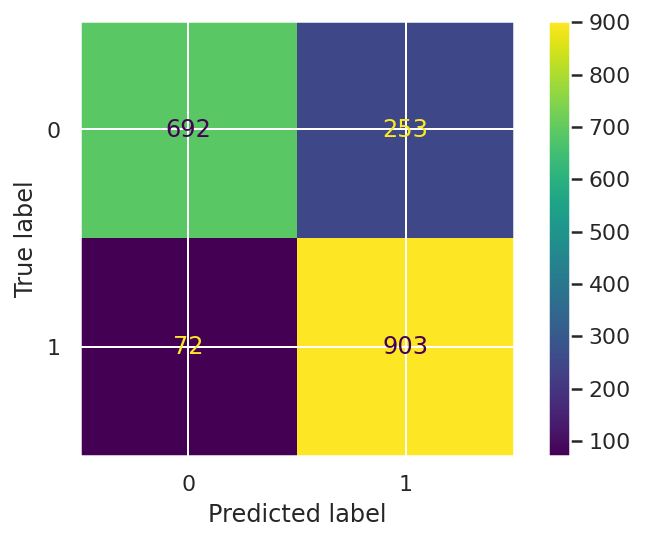

In [ ]:
mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(mat)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving final_augdata.csv to final_augdata.csv


In [ ]:
df = pd.read_csv('final_augdata.csv')


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 1.51 ms, sys: 0 ns, total: 1.51 ms
Wall time: 1.27 ms


In [ ]:
%%time
cleaned_df = text_preprocessing(df, "text")

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

CPU times: user 6min 15s, sys: 3.9 s, total: 6min 19s
Wall time: 6min 19s


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.text:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(50)

[('court', 22490),
 ('overrule', 12056),
 ('v', 10682),
 ('case', 7699),
 ('state', 7006),
 ('decision', 6967),
 ('defendant', 6832),
 ('hold', 6425),
 ('trial', 4566),
 ('extent', 4432),
 ('rule', 4267),
 ('appeal', 4041),
 ('law', 4038),
 ('find', 3553),
 ('evidence', 3433),
 ('opinion', 3027),
 ('right', 2917),
 ('district', 2812),
 ('s', 2797),
 ('motion', 2608),
 ('order', 2534),
 ('objection', 2513),
 ('2d', 2317),
 ('claim', 2282),
 ('disapprove', 2181),
 ('application', 2104),
 ('issue', 2090),
 ('judgment', 2060),
 ('person', 1973),
 ('plaintiff', 1925),
 ('fact', 1912),
 ('united', 1907),
 ('supra', 1906),
 ('states', 1875),
 ('require', 1850),
 ('action', 1780),
 ('act', 1764),
 ('statute', 1762),
 ('d', 1734),
 ('inconsistent', 1664),
 ('question', 1641),
 ('supreme', 1635),
 ('err', 1605),
 ('consider', 1554),
 ('new', 1522),
 ('follow', 1498),
 ('jury', 1494),
 ('apply', 1491),
 ('1', 1471),
 ('party', 1461)]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.text, cleaned_df.label, test_size = 0.2, stratify = cleaned_df.label, shuffle=True)

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 24600
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=217,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 217, padding = 'post')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [ ]:
EMBEDDING_DIM = 500
model_withaug = Sequential()
model_withaug.add(Embedding(input_dim = num_words,# the whole vocabulary size
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))

model_withaug.add(Bidirectional(CuDNNGRU(256,return_sequences=True)))
model_withaug.add(Dropout(0.2))

model_withaug.add(Bidirectional(CuDNNGRU(128,return_sequences=True)))
model_withaug.add(Dropout(0.2))

model_withaug.add(Bidirectional(CuDNNGRU(64,return_sequences=False)))
model_withaug.add(Dropout(0.2))

model_withaug.add(Dense(32, activation = 'relu'))
model_withaug.add(Dropout(0.2))

model_withaug.add(Dense(1, activation = 'sigmoid'))

model_withaug.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-3, decay=1e-5),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./modelBIgru(aug).h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
history_embedding = model_withaug.fit(X_train_pad,y_train, epochs = 15, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/15
318/318 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8235
Epoch 1: val_accuracy improved from -inf to 0.86072, saving model to ./modelBIgru(aug).h5
318/318 [==============================] - 60s 177ms/step - loss: 0.3828 - accuracy: 0.8235 - val_loss: 0.3117 - val_accuracy: 0.8607
Epoch 2/15
318/318 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.8988
Epoch 2: val_accuracy improved from 0.86072 to 0.86649, saving model to ./modelBIgru(aug).h5
318/318 [==============================] - 54s 170ms/step - loss: 0.2305 - accuracy: 0.8988 - val_loss: 0.3139 - val_accuracy: 0.8665
Epoch 3/15
318/318 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9235
Epoch 3: val_accuracy improved from 0.86649 to 0.86702, saving model to ./modelBIgru(aug).h5
318/318 [==============================] - 54s 171ms/step - loss: 0.1695 - accuracy: 0.9235 - val_loss: 0.3189 - val_accuracy: 0.8670
Epoch 4/15
318/318 [==============

In [ ]:
from sklearn.metrics import roc_curve
y_pred_withaug = model_withaug.predict(X_test_pad).ravel()
fpr_withaug, tpr_withaug, thresholds_withaug = roc_curve(y_test, y_pred_withaug)

298/298 [==============================] - 8s 24ms/step


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test_pad).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

298/298 [==============================] - 8s 24ms/step


In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
from sklearn.metrics import auc
auc_withaug = auc(fpr_withaug, tpr_withaug)

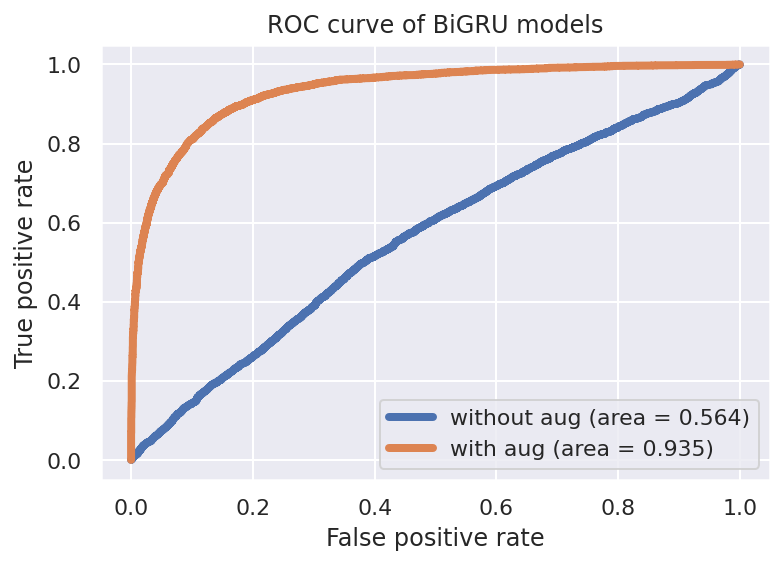

In [ ]:
plt.plot(fpr_keras, tpr_keras, linewidth=4, label='without aug (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_withaug, tpr_withaug,linewidth=4, label='with aug (area = {:.3f})'.format(auc_withaug))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of BiGRU models')
plt.legend(loc='best')
plt.savefig("ROC_BIGRU.pdf", format="pdf", bbox_inches="tight")
plt.show()